In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Create Fully Connected Layer

In [4]:
class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 50)
        self.fc2 = nn.Linear(50, num_classes)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Set Device

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set Hyperparameters

In [6]:
INPUT_SIZE = 784
NUM_CLASSES = 10
LEARNING_RATE = 0.001
BATCH_SIZE = 64
NUM_EPOCHS = 1

# Load Data

In [7]:
train_dataset = datasets.MNIST(root="dataset/", train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

test_dataset = datasets.MNIST(root="dataset/", train=False, transform=transforms.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 95330679.43it/s]


Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 87906889.57it/s]


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25518764.47it/s]


Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3533765.31it/s]


Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



# Initialize Network

In [8]:
model = NN(input_size=INPUT_SIZE, num_classes=NUM_CLASSES).to(device)

# Loss and Optimizer

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Train the Network

In [27]:
for epoch in range(NUM_EPOCHS):
    for batch_idx, (data, targets) in enumerate(train_loader):
        
        # print(f"Batch Index: {batch_idx}, Original Data Shape: {data.shape}, Length of Target: {len(targets)}")
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)
        
        # Get to correct shape
        data = data.reshape(data.shape[0], -1)
        # print(f"Data Shape after Reshaping: {data.shape}")
              
        # Do the forward part of the Neural Network
        scores = model(data)
        # print(f"Scores shape: {scores.shape}")
        loss = criterion(scores, targets)
        # print(f"Loss: {loss}")
        
        # Do the Backward Propagation
        optimizer.zero_grad()    # set all the gradients to '0' for each batch
        loss.backward()    # this will calculate the gradient with respect to loss in the backward direction with all parameters, note that: it's not updating the parameters, it's just calculating the gradients
        
        # Do the Gradient Descent or Adam Step
        optimizer.step()    # the parameters will be updated at this step based on the gradients that are computed.
        
        # print("="*90)

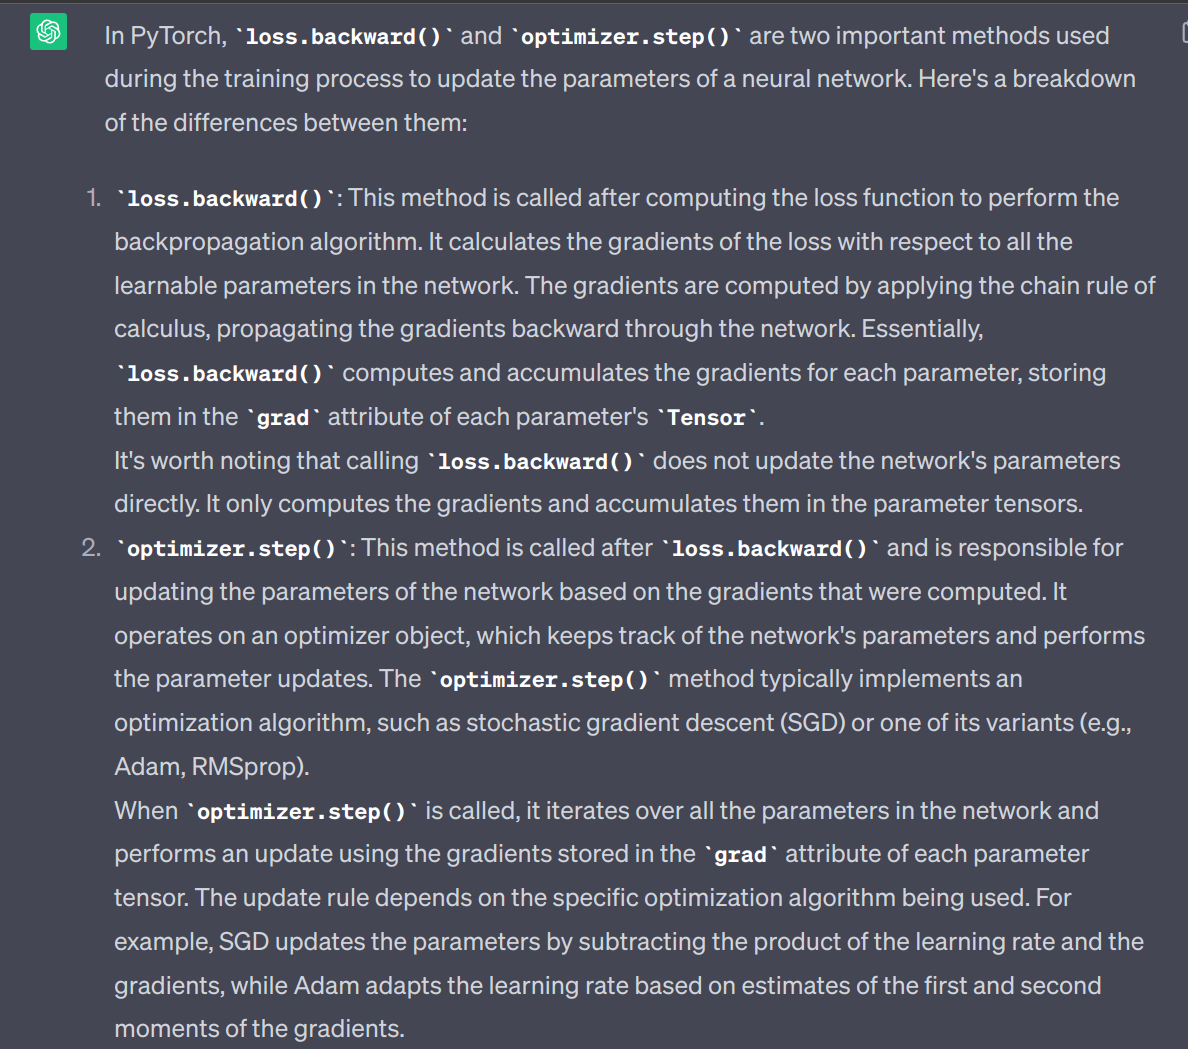

# Check Accuracy on Train and Test to see how good our model is...

In [25]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():    # do not calculate the gradients for the operations in evaluation mode
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            x = x.reshape(x.shape[0], -1)
            
            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
            
        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")
        
    model.train()

In [26]:
check_accuracy(train_loader, model)
check_accuracy(test_loader, model)

Got 55995 / 60000 with accuracy 93.33
Got 9314 / 10000 with accuracy 93.14
